In [1]:
import numpy as np

from utils import show_graph, show_multiple_graph
from generator import generate, generate_and_give_tau

from em import get_X_from_graph, main, return_priors_pi
np.set_printoptions(precision=4, suppress=True)

In this first example, the algorithm works when the tau are estimated with the true ones, but it fails to converge when the tau used to initialize the values are not the good ones

/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the approximated priors are : 
[0.82 0.18]
And the true one are :
[0.18 0.82]
the approximated pi are :
[[0.9756 0.122 ]
 [0.122  0.8889]]
and the true one is : 
[[0.8889 0.122 ]
 [0.122  0.9756]]


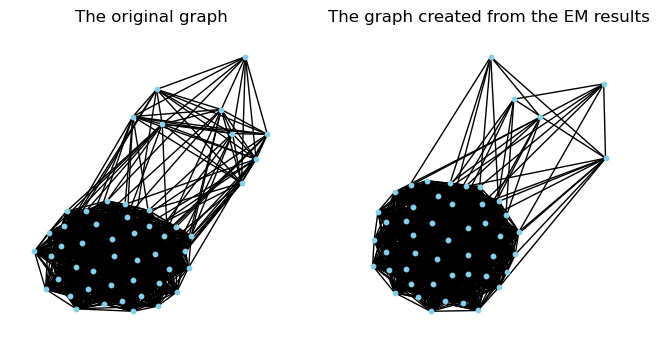

In [2]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

np.random.seed(2)
graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)

the approximated priors are : 
[0.8 0.2]
And the true one are :
[0.8 0.2]
the approximated pi are :
[[0.875 0.   ]
 [0.    0.5  ]]
and the true one is : 
[[0.875 0.   ]
 [0.    0.5  ]]


/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


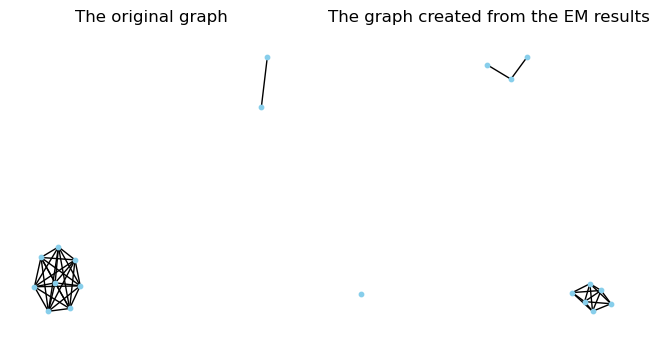

In [4]:
np.random.seed(2)
n_vertices = 10
pi = np.array([[1,0],[0,1]])
priors = np.array([0.5,0.5])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)

the approximated priors are : 
[0.2 0.8]
And the true one are :
[0.2 0.8]
the approximated pi are :
[[0. 1.]
 [1. 0.]]
and the true one is : 
[[0. 1.]
 [1. 0.]]


/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em.py:102: RuntimeWarning: invalid value encountered in divide
  tau = tau / tau.sum(axis=1, keepdims=True)


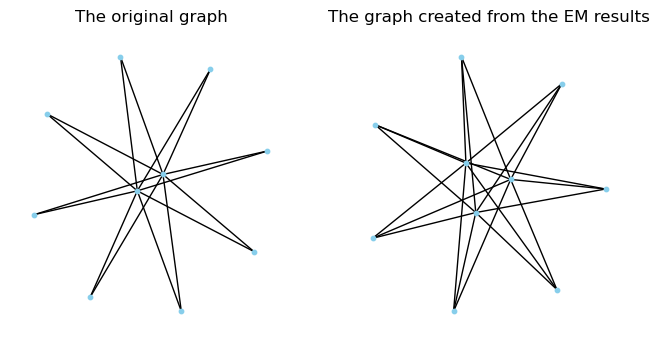

In [5]:
np.random.seed(1)
n_vertices = 10
pi = np.array([[0,1],[1,0]])
priors = np.array([0.1,0.9])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)

the approximated priors are : 
[0.8333 0.1667]
And the true one are :
[0.1667 0.8333]
the approximated pi are :
[[0.9 0.1]
 [0.1 0.5]]
and the true one is : 
[[0.5 0.1]
 [0.1 0.9]]


/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


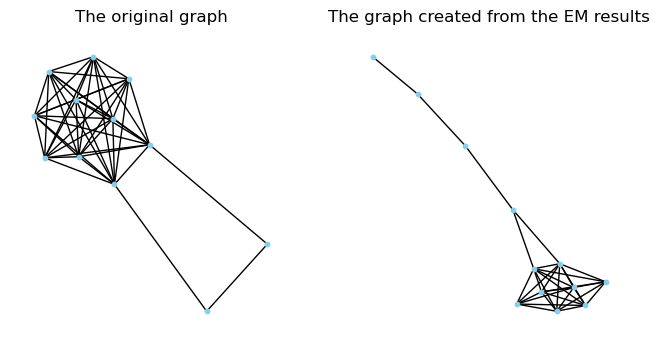

In [7]:
n_vertices = 12
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)

/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the approximated priors are : 
[0. 1. 0. 0.]
And the true one are :
[0.04 0.44 0.46 0.06]
the approximated pi are :
[[0.5368 0.5368 0.5368 0.5368]
 [0.5368 0.5368 0.5368 0.5368]
 [0.5368 0.5368 0.5368 0.5368]
 [0.5368 0.5368 0.5368 0.5368]]
and the true one is : 
[[0.     1.     0.0435 0.1667]
 [1.     0.095  1.     0.0455]
 [0.0435 1.     0.0832 1.    ]
 [0.1667 0.0455 1.     0.2222]]


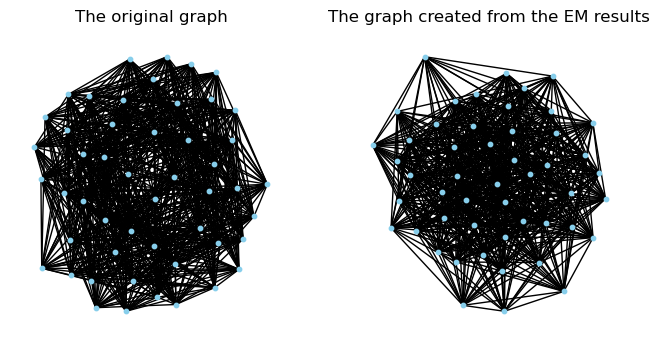

In [8]:
n_vertices = 50
pi = np.array([[0.1,1,0.1,0.1],[1,0.1,1,0.1],[0.1,1,0.1,1],[0.1,0.1,1,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

X = get_X_from_graph(graph)
emp_prior, emp_pi = return_priors_pi(X, tau.copy())
# appro_priors, appro_pi = main_with_tau(X, tau.copy(), n_clusters, 50)
appro_priors, appro_pi = main(X, n_clusters, max_iter)
print("the approximated priors are : ")
print(appro_priors)
print('And the true one are :')
print(emp_prior)
print('the approximated pi are :')
print(appro_pi)
print("and the true one is : ")
print(emp_pi)

graph_emp, tau = generate_and_give_tau(n_vertices, appro_pi , appro_priors)
show_multiple_graph([graph, graph_emp], ["The original graph", "The graph created from the EM results"], with_labels=False, node_size=10, font_size=1)